In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn import svm 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv('adultcensusincome.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.applymap(lambda x: '?' in str(x)).sum()

/var/folders/6_/15c6b7xn4kn48qzmlvd845l80000gp/T/ipykernel_28609/1146515090.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: '?' in str(x)).sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [6]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [7]:
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native.country'] = df['native.country'].replace('?', np.nan)

In [8]:
df.applymap(lambda x: '?' in str(x)).sum()

/var/folders/6_/15c6b7xn4kn48qzmlvd845l80000gp/T/ipykernel_28609/1146515090.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: '?' in str(x)).sum()


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
df.applymap(lambda x: '?' in str(x)).sum()

/var/folders/6_/15c6b7xn4kn48qzmlvd845l80000gp/T/ipykernel_28609/1146515090.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: '?' in str(x)).sum()


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [12]:
missing_values = df.isnull().sum()

In [13]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Create a distribution plot for columns income, age,
education.num, and education

In [14]:
df['income'].value_counts()

income
<=50K    22654
>50K      7508
Name: count, dtype: int64

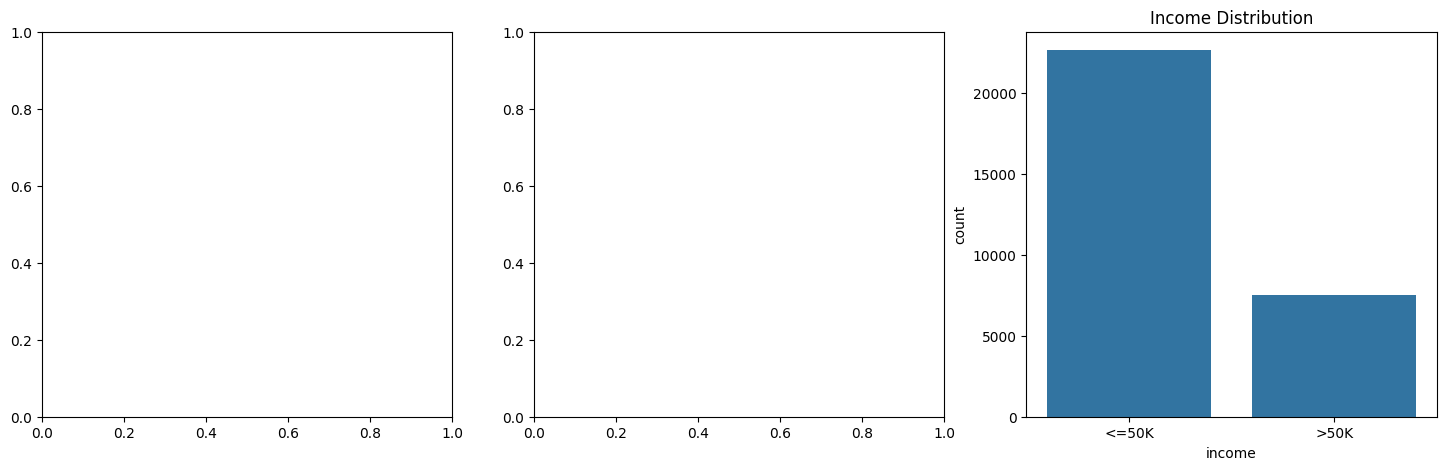

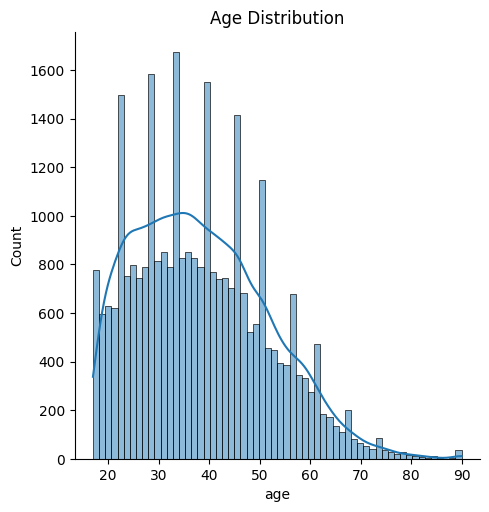

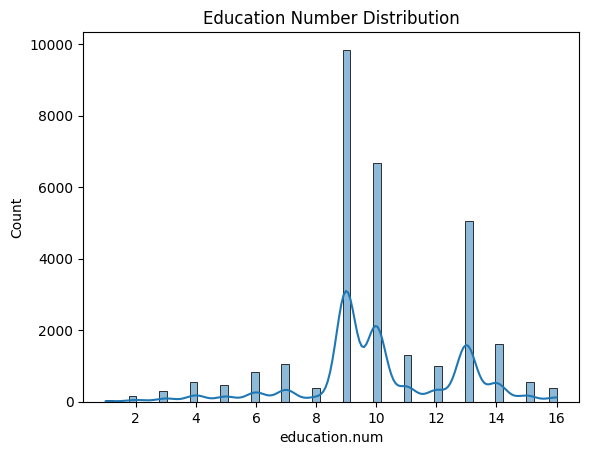

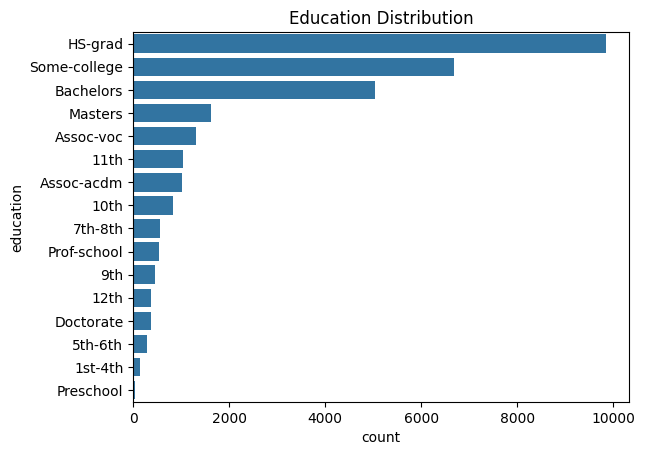

In [18]:
# Distribution plot for 'income'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.show()


# Distribution plot for 'age'
sns.displot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Distribution plot for 'education.num'
sns.histplot(df['education.num'], kde=True)
plt.title('Education Number Distribution')
plt.show()

# Distribution plot for 'education'
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Education Distribution')
plt.show()


<Figure size 2000x1000 with 0 Axes>

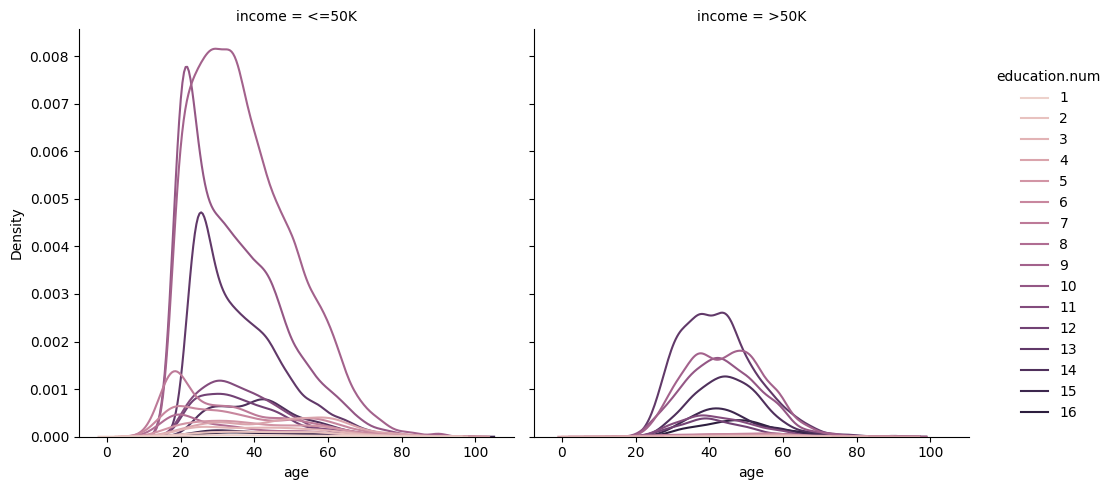

In [17]:
plt.figure(figsize=(20,10))
sns.displot(data=df, x='age', hue='education.num', col='income', kind='kde')
plt.show()

In [21]:
df['marital.status'].sample(10)

10105         Never-married
4941          Never-married
9151          Never-married
19316         Never-married
13516    Married-civ-spouse
7625     Married-civ-spouse
26212         Never-married
12695         Never-married
28919    Married-civ-spouse
12393    Married-civ-spouse
Name: marital.status, dtype: object

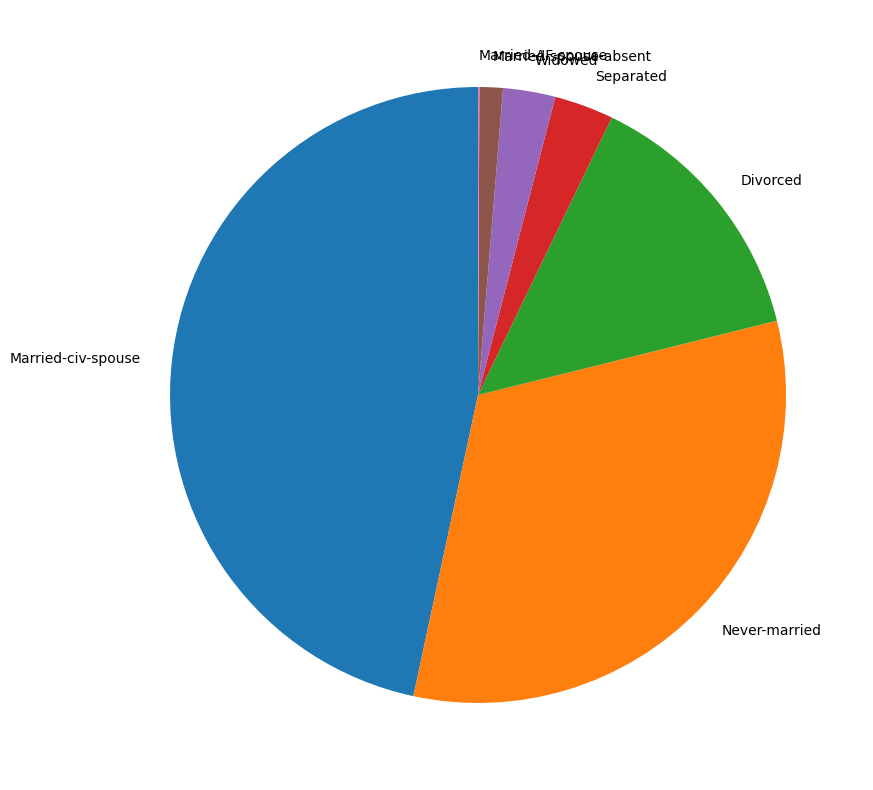

In [24]:
plt.figure(figsize=(20,10))
plt.pie(df['marital.status'].value_counts(), labels=df['marital.status'].value_counts().index, startangle=90)
plt.show()

<Axes: ylabel='count'>

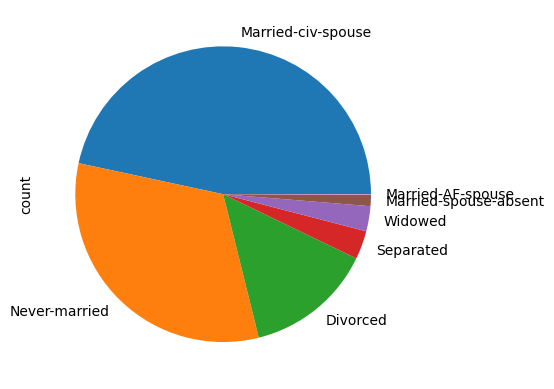

In [23]:
df['marital.status'].value_counts().plot(kind='pie')

In [25]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

<Axes: xlabel='age', ylabel='education.num'>

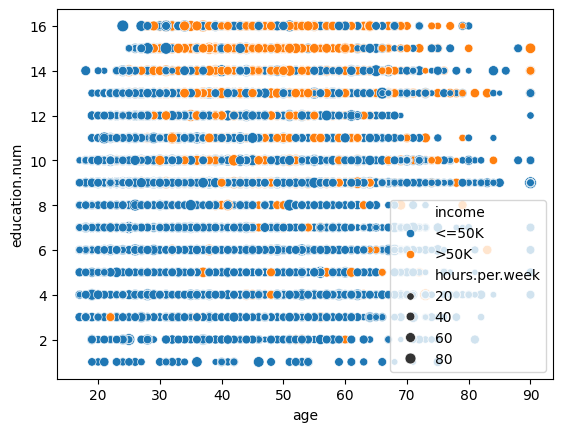

In [33]:
sns.scatterplot(data=df, x='age', y='education.num', hue='income', size='hours.per.week', size_order=[5,40,70,100])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, '7th-8th'),
  Text(2, 0, 'Some-college'),
  Text(3, 0, '10th'),
  Text(4, 0, 'Doctorate'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, 'Bachelors'),
  Text(7, 0, 'Masters'),
  Text(8, 0, '11th'),
  Text(9, 0, 'Assoc-voc'),
  Text(10, 0, '1st-4th'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, 'Assoc-acdm'),
  Text(13, 0, '12th'),
  Text(14, 0, '9th'),
  Text(15, 0, 'Preschool')])

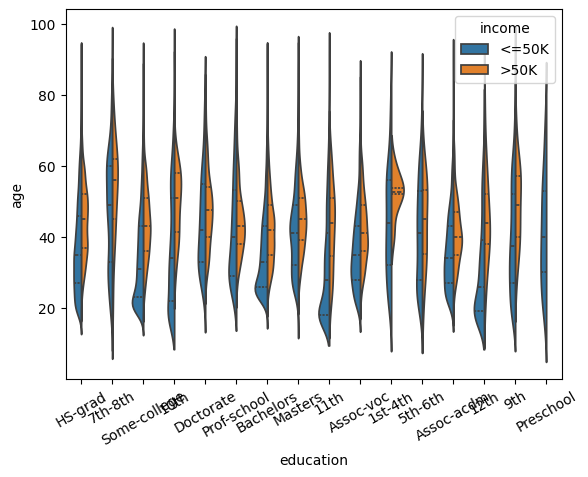

In [28]:
sns.violinplot(data=df, x='education', y='age', hue='income', split=True, inner='quart')
plt.xticks(rotation=30)

<Axes: xlabel='income', ylabel='count'>

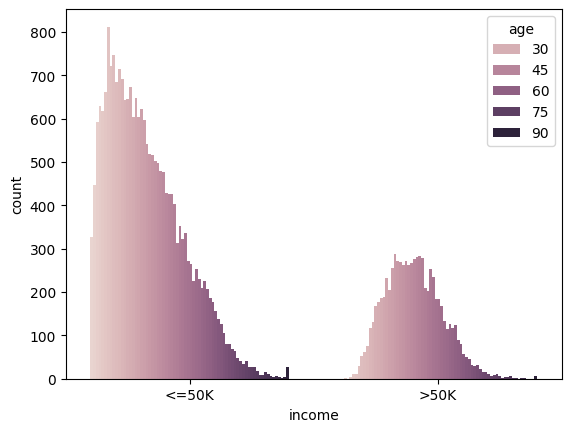

In [35]:
sns.countplot(data=df, x='income', hue='age')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71],
 [Text(0, 0, '17'),
  Text(1, 0, '18'),
  Text(2, 0, '19'),
  Text(3, 0, '20'),
  Text(4, 0, '21'),
  Text(5, 0, '22'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '25'),
  Text(9, 0, '26'),
  Text(10, 0, '27'),
  Text(11, 0, '28'),
  Text(12, 0, '29'),
  Text(13, 0, '30'),
  Text(14, 0, '31'),
  Text(15, 0, '32'),
  Text(16, 0, '33'),
  Text(17, 0, '34'),
  Text(18, 0, '35'),
  Text(19, 0, '36'),
  Text(20, 0, '37'),
  Text(21, 0, '38'),
  Text(22, 0, '39'),
  Text(23, 0, '40'),
  Text(24, 0, '41'),
  Text(25, 0, '42'),
  Text(26, 0, '43'),
  Text(27, 0, '44'),

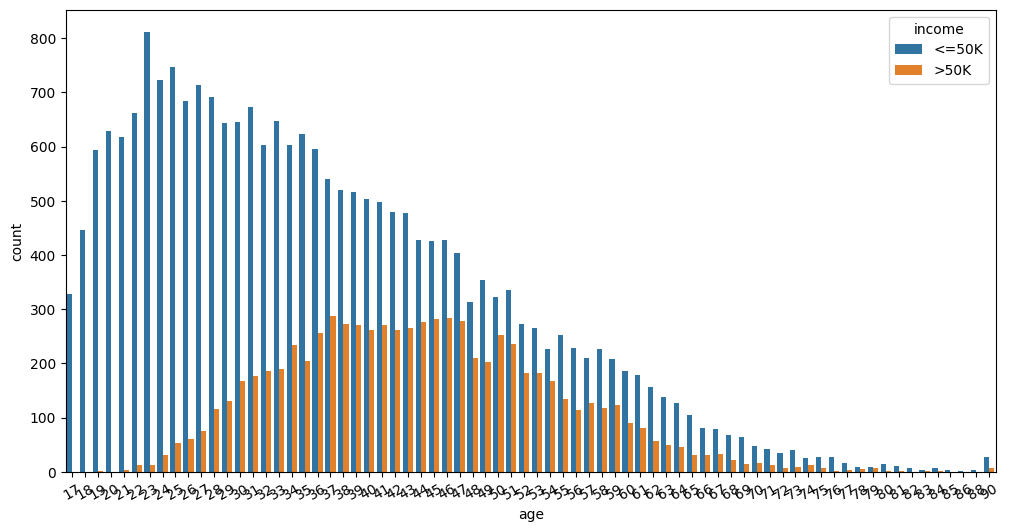

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age', hue='income')
plt.xticks(rotation=30)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.7+ MB


In [43]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
1,82,132870,9,0,4356,18
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
5,34,216864,9,0,3770,45
6,38,150601,6,0,3770,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [44]:
corr_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

<Axes: >

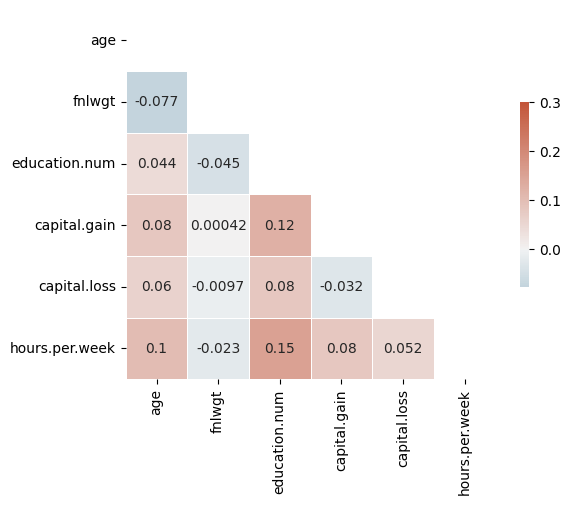

In [45]:
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [47]:
df.sample(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
12614,57,Private,361324,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
21924,26,Private,59367,Bachelors,13,Never-married,Machine-op-inspct,Other-relative,White,Male,0,0,40,United-States,0
29219,63,Private,31389,11th,7,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,12,United-States,0
11585,23,Private,118693,Bachelors,13,Never-married,Other-service,Not-in-family,White,Male,0,0,35,United-States,0
20137,50,Private,191299,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,0
1256,19,Private,283945,10th,6,Never-married,Handlers-cleaners,Other-relative,White,Male,0,1602,45,United-States,0
15463,26,Private,150062,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,0
8154,27,Private,126060,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0
6858,27,State-gov,28848,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,9,United-States,0
5584,43,Local-gov,160574,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0


education ordinal
sex binary

In [ ]:
df = pd.get_dummies(df, columns=['workclass', 'occupation', 'relationship', 'race', ''])